In [5]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

readingsA = []
readingsB = []
timeStamps = []

def handler(sender, msg):
    msg = msg.decode("utf-8")
    data = msg.split("|")
    readingsA.append(data[1])
    readingsB.append(data[2])
    timeStamps.append(data[0])
    print(msg)

ble.start_notify(ble.uuid['RX_STRING'], handler)
ble.send_command(CMD.GET_TOF_DATA_5S, "")

2023-02-21 15:15:25,775 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:0c:66:2f:3c
2023-02-21 15:15:28,996 | INFO     |: Connected to c0:83:0c:66:2f:3c
15227|67|3725
15471|67|3889
15721|68|3755
15970|68|3750
16219|66|3782
16472|69|3742
16722|66|3808
16970|67|3716
17220|68|3693
17468|66|3756
17717|67|3731
17961|66|3828
18213|67|3712
18463|66|3751
18709|67|3746
18962|67|3801
19212|65|3765
19456|67|3679
19709|66|3804
19955|64|3673
20203|65|3791
20451|67|3815
20702|66|3793
20950|66|3822
21202|66|3791


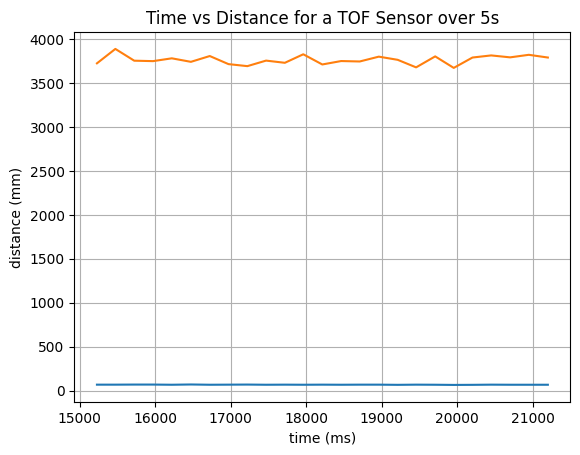

2023-02-21 15:18:25,047 | INFO     |: Disconnected from C0:83:0C:66:2F:3C


In [11]:
fig, ax = plt.subplots()
ax.plot(np.array(timeStamps).astype(float), np.array(readingsA).astype(float))
ax.plot(np.array(timeStamps).astype(float), np.array(readingsB).astype(float))

ax.set(xlabel='time (ms)', ylabel='distance (mm)',
       title='Time vs Distance for a TOF Sensor over 5s')
ax.grid()

fig.savefig("test.png")
plt.show()

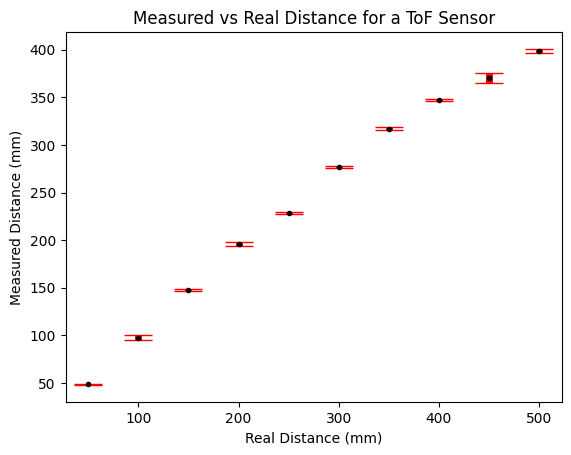

In [52]:
data = [
[
97, 49, 0.16,
95, 50, 0.16,
98, 48, 0.16,
95, 49, 0.16,
97, 49, 0.16,
95, 48, 0.16,
98, 49, 0.16,
95, 48, 0.16,
98, 48, 0.16,
95, 48, 0.16
],
[
97, 94, 0.31,
95, 97, 0.32,
98, 98, 0.32,
95, 98, 0.32,
97, 98, 0.32,
94, 94, 0.31,
98, 98, 0.32,
95, 105, 0.34,
97, 97, 0.32,
95, 97, 0.32
],
[
97, 149, 0.49,
95, 146, 0.48,
98, 146, 0.48,
95, 146, 0.48,
98, 147, 0.48,
95, 148, 0.49,
98, 148, 0.49,
95, 147, 0.48,
97, 148, 0.49,
95, 148, 0.49
],
[
97, 195, 0.64,
95, 194, 0.64,
98, 199, 0.65,
95, 198, 0.65,
98, 198, 0.65,
95, 197, 0.65,
98, 196, 0.64,
95, 197, 0.65,
97, 193, 0.63,
95, 192, 0.63
],
[
97, 230, 0.75,
95, 228, 0.75,
98, 228, 0.75,
94, 229, 0.75,
97, 230, 0.75,
94, 229, 0.75,
97, 229, 0.75,
95, 227, 0.74,
98, 228, 0.75,
95, 229, 0.75
],
[
97, 277, 0.91,
95, 276, 0.91,
98, 275, 0.90,
95, 278, 0.91,
98, 277, 0.91,
95, 276, 0.91,
98, 279, 0.92,
95, 277, 0.91,
97, 276, 0.91
],
[
97, 320, 1.05,
95, 318, 1.04,
98, 315, 1.03,
95, 314, 1.03,
98, 317, 1.04,
95, 318, 1.04,
98, 316, 1.04,
95, 316, 1.04,
97, 317, 1.04,
95, 318, 1.04
],
[
97, 347, 1.14,
95, 347, 1.14,
98, 348, 1.14,
95, 348, 1.14,
98, 346, 1.14,
95, 346, 1.14,
98, 347, 1.14,
95, 347, 1.14,
97, 347, 1.14,
94, 348, 1.14
],
[
97, 363, 1.19,
95, 366, 1.20,
98, 363, 1.19,
94, 373, 1.22,
97, 375, 1.23,
94, 375, 1.23,
97, 375, 1.23,
95, 375, 1.23,
98, 362, 1.19,
94, 374, 1.23
],
[
97, 403, 1.32,
95, 398, 1.31,
98, 398, 1.31,
94, 400, 1.31,
97, 399, 1.31,
94, 400, 1.31,
97, 396, 1.30,
95, 400, 1.31,
98, 396, 1.30,
95, 399, 1.31
]
]

mean = []
stDev = []
dist = []
currDist = 50

for i in range(0, len(data)):
    points = []
    for j in range(0, math.floor(len(data[i])/3)):
        points.append(data[i][j*3+1])
    mean.append(np.mean(points))
    stDev.append(np.std(points))
    dist.append(currDist)
    currDist += 50
    

plt.errorbar(dist, mean, yerr=stDev, fmt='.', color='black', ecolor='red', elinewidth=5, capsize=10);
plt.xlabel("Real Distance (mm)")
plt.ylabel("Measured Distance (mm)")
plt.title("Measured vs Real Distance for a ToF Sensor")
plt.savefig("error.png")
